<a href="https://colab.research.google.com/github/thiagolimaop/banknotes/blob/main/Estudo_Cimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo do cimento em relação ao mercado

## 1. Definição dos objetivos

#### a) O preço do cimento esta positivamente correlacionado com o IPCA (Índice de Preços ao Consumidor Amplo)?

#### b) Existe uma relação de causalidade entre o consumo de cimento e a produção de cimento?

#### c) Há uma correlação negativa entre as admissões no setor de construção civil e o preço do cimento?

## 2. Carga de Dados
Vamos iniciar importando as bibliotecas e carregando o arquivo .csv através do pacote Pandas.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importação das bibliotecas usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
# Mostra as 5 primeiras linhas do dataset
df = pd.read_csv('cimento_economia.csv')
df.head()

,producao,year,mes,consumo,uf,preco_cimento,ipca_variacao_mensal,ipca_variacao_doze_meses,num_obras,demissoes,admissoes
0,19525.0,2018,3,52169,MA,0.50,0.09,2.68,622,1662,1544
1,NaN,2018,3,9724,AC,NaN,0.09,2.68,152,244,146
2,47641.0,2018,3,37638,RN,NaN,0.09,2.68,704,1916,2460
3,42317.0,2018,3,69448,MS,0.42,0.09,2.68,4304,1460,1556
4,1054857.0,2018,3,402406,MG,0.31,0.09,2.68,16054,14878,18014


## 3. Análise de Dados
### 3.1 Análise descritiva

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [3]:
# Mostra as dimensões do dataset
df.shape

(1107, 11)

In [4]:
# Mostra as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   producao                  935 non-null    float64
 1   year                      1107 non-null   int64  
 2   mes                       1107 non-null   int64  
 3   consumo                   1107 non-null   int64  
 4   uf                        1107 non-null   object 
 5   preco_cimento             861 non-null    float64
 6   ipca_variacao_mensal      1107 non-null   float64
 7   ipca_variacao_doze_meses  1107 non-null   float64
 8   num_obras                 1107 non-null   int64  
 9   demissoes                 1107 non-null   int64  
 10  admissoes                 1107 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 95.3+ KB


In [5]:
# Mostra as 10 primeiras linhas do dataset
df.head(10)

,producao,year,mes,consumo,uf,preco_cimento,ipca_variacao_mensal,ipca_variacao_doze_meses,num_obras,demissoes,admissoes
0,19525.0,2018,3,52169,MA,0.5000,0.09,2.68,622,1662,1544
1,NaN,2018,3,9724,AC,NaN,0.09,2.68,152,244,146
2,47641.0,2018,3,37638,RN,NaN,0.09,2.68,704,1916,2460
3,42317.0,2018,3,69448,MS,0.4200,0.09,2.68,4304,1460,1556
4,1054857.0,2018,3,402406,MG,0.3100,0.09,2.68,16054,14878,18014
5,193191.0,2018,3,56652,PB,0.3860,0.09,2.68,1026,2094,1836
6,456364.0,2018,3,855245,SP,0.3730,0.09,2.68,44382,31258,31714
7,19286.0,2018,3,20879,AM,0.5130,0.09,2.68,294,1062,754
8,16454.0,2018,3,138148,PE,0.3834,0.09,2.68,704,2884,3162
9,168363.0,2018,3,173121,RJ,0.4200,0.09,2.68,526,6504,5770


In [6]:
# Mostra as 10 últimas linhas do dataset
df.tail(10)

,producao,year,mes,consumo,uf,preco_cimento,ipca_variacao_mensal,ipca_variacao_doze_meses,num_obras,demissoes,admissoes
1097,35028.0,2021,4,51654,AM,0.7600,0.31,6.76,74,1682,2588
1098,1289442.0,2021,4,590176,MG,0.5020,0.31,6.76,3598,42564,47650
1099,275897.0,2021,4,88837,PB,0.4100,0.31,6.76,414,3028,4106
1100,65847.0,2021,4,90704,ES,0.4650,0.31,6.76,484,5436,5866
1101,NaN,2021,4,13435,AC,NaN,0.31,6.76,100,638,622
1102,184738.0,2021,4,44494,SE,0.5400,0.31,6.76,254,2170,1738
1103,174513.0,2021,4,226450,GO,0.4502,0.31,6.76,2440,8156,12622
1104,75585.0,2021,4,98070,MS,0.5450,0.31,6.76,836,2294,3226
1105,94069.0,2021,4,306242,BA,0.6048,0.31,6.76,376,14888,16310
1106,NaN,2021,4,61534,PI,NaN,0.31,6.76,332,2120,2398


In [7]:
# Verifica o tipo de dataset de cada atributo
df.dtypes

producao                    float64
year                          int64
mes                           int64
consumo                       int64
uf                           object
preco_cimento               float64
ipca_variacao_mensal        float64
ipca_variacao_doze_meses    float64
num_obras                     int64
demissoes                     int64
admissoes                     int64
dtype: object

In [8]:
# Quantidade de valores nulos por coluna
df.isnull().sum()

producao                    172
year                          0
mes                           0
consumo                       0
uf                            0
preco_cimento               246
ipca_variacao_mensal          0
ipca_variacao_doze_meses      0
num_obras                     0
demissoes                     0
admissoes                     0
dtype: int64

In [9]:
# Quais estados não possuem dados de produção
df.groupby('uf')['producao'].apply(lambda x: x.isnull().sum())

uf
AC    41
AL     8
AM     0
AP    41
BA     0
CE     0
DF     0
ES     0
GO     0
MA     0
MG     0
MS     0
MT     0
PA     0
PB     0
PE     0
PI    41
PR     0
RJ     0
RN     0
RO     0
RR    41
RS     0
SC     0
SE     0
SP     0
TO     0
Name: producao, dtype: int64

Aparentemente não possuimos dados de produção de cimento para os estados do Acre, Amapá, Piauí  e Roraima. E pelo menos 8 meses do estado de Alagoas também estão sem esses dados.

In [10]:
# Quais estados não possuem dados de produção
df.groupby('uf')['preco_cimento'].apply(lambda x: x.isnull().sum())

uf
AC    41
AL     0
AM     0
AP    41
BA     0
CE     0
DF     0
ES     0
GO     0
MA     0
MG     0
MS     0
MT     0
PA     0
PB     0
PE     0
PI    41
PR     0
RJ     0
RN    41
RO     0
RR    41
RS     0
SC     0
SE     0
SP     0
TO    41
Name: preco_cimento, dtype: int64

Aparentemente não possuimos dados de precificação do cimento para os estados do Acre, Amapá, Piauí e Roraima e tocantins.

In [11]:
# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

In [12]:
import datetime
import matplotlib.dates as mdates

df['saldo_emprego'] = df['admissoes'] - df['demissoes']
df['competencia'] = df['year'].astype(str) + '-' + df['mes'].astype(str)
df['competencia'] = pd.to_datetime(df['competencia'], format='%Y-%m')
df.sort_values(by='competencia', inplace=True)
df['competencia'] = df['competencia'].dt.strftime('%Y-%m')

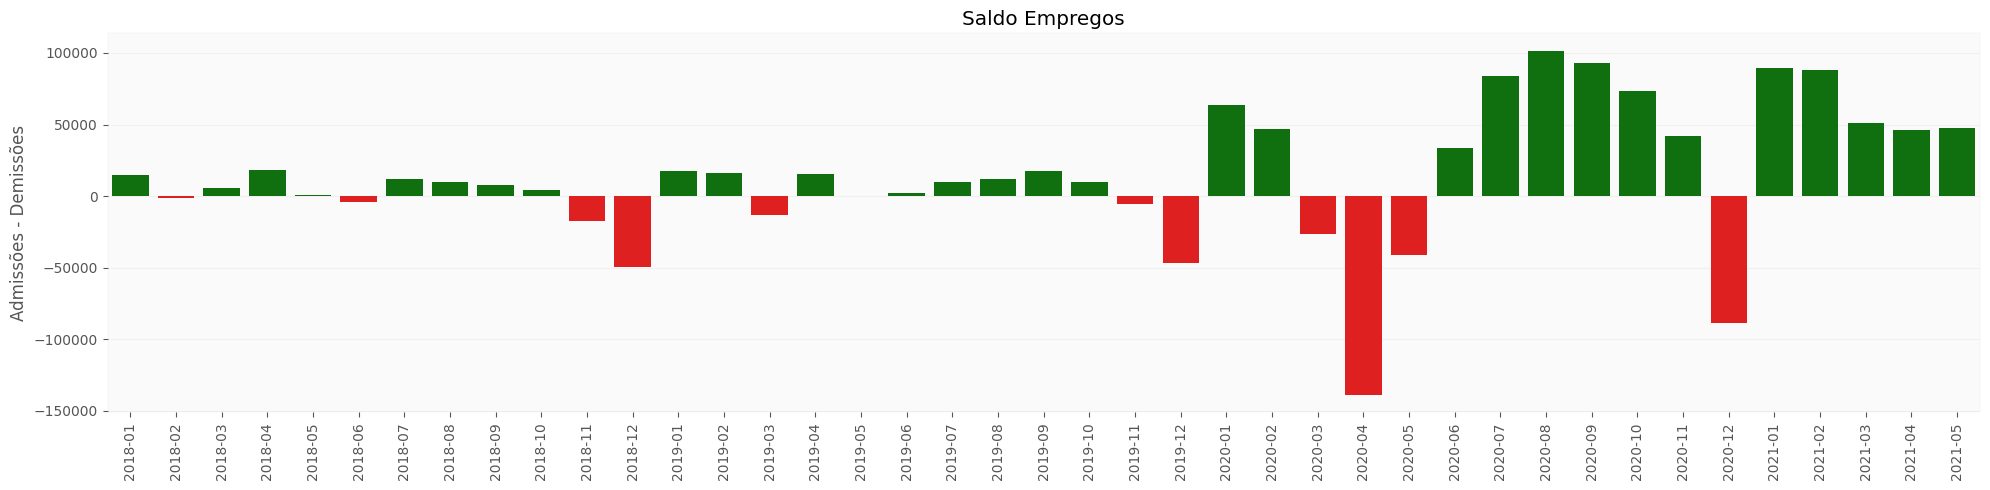

In [13]:
fig, ax = plt.subplots(1, 1,  figsize=(20, 5))

df_chart = df.groupby('competencia')['saldo_emprego'].sum().reset_index()
colors = ['red' if valor < 0 else 'green' for valor in df_chart['saldo_emprego']]
sns.barplot(x='competencia', y='saldo_emprego', data=df_chart, palette=colors)

# Rotação das etiquetas do eixo x para melhor legibilidade (opcional)
plt.xticks(rotation=90)

# Adicionar rótulos de eixo e título (opcional)
ax.set_ylabel('Admissões - Demissões')
ax.set_xlabel('')
ax.set_title('Saldo Empregos')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Este gráfico mostra em verde o numero de admissões que superou as demissões, e em vermelho quando o número de demissões superou o número de admissões em um determinado mês. Podemos ver que o mês de novembro e dezembro se repetem nos anos como meses onde o número de demissões supera o número de admissões. Dífícil dizer se isso é devido à fatores climáticos, ou simplesmente por finalização de contratos de obras, algo muito comum no setor de construção civil.

Um fato que chama a atenção é alta de demissões no período de março e maio de 2020. A pandemia se iniciou no Brasil em março de 2020, logo após o carnaval. Este número mostra exatamente o reflexo das consequências da pandemia da COVID19. Ao mesmo tempo em abril de 2020 o [governo anuncia um plano de investimento em obras de infraestrutura](https://forbes.com.br/colunas/2020/04/plano-de-retomada-do-governo-preve-investimentos-em-infraestrutura/), e a partir de junho os números de admissões superam vertiginosamente as demissões nos meses seguintes.

o ano de 2020 e 2021 mostram valores muito foram da curva.

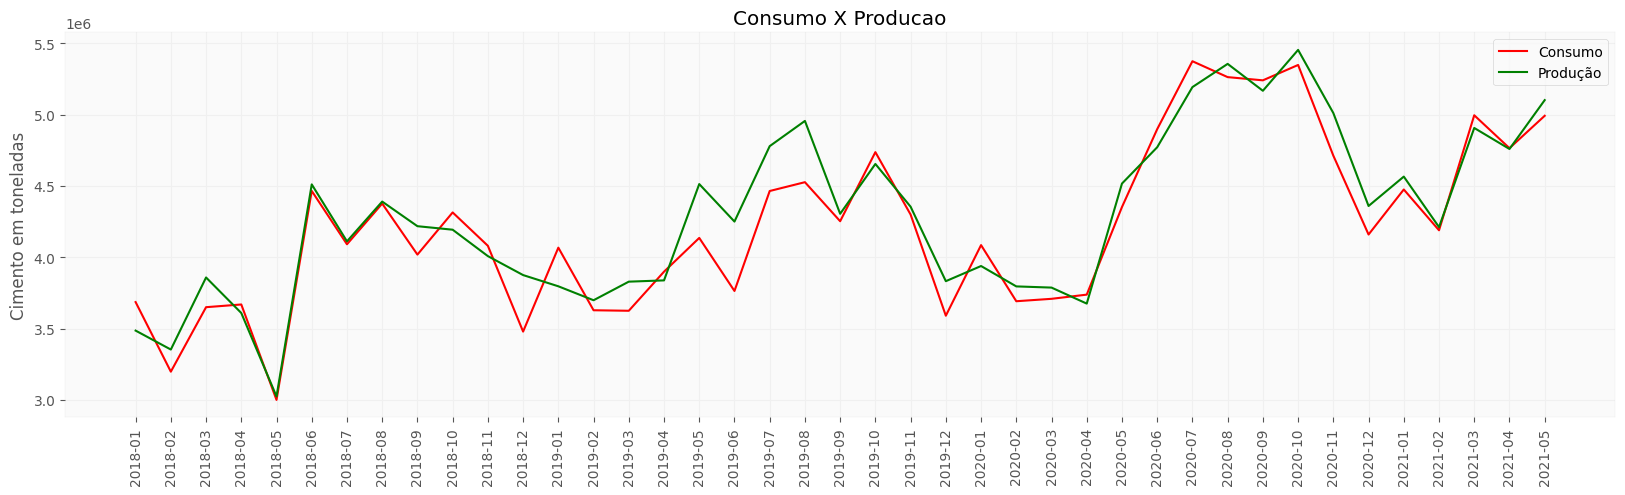

In [21]:
plt.figure(figsize=(20, 5))

df_chart = df.groupby('competencia')[['consumo', 'producao']].sum().reset_index()
sns.lineplot(x='competencia', y='consumo', data=df_chart, color='red', label='Consumo')
sns.lineplot(x='competencia', y='producao', data=df_chart, color='green', label='Produção')

# Rotação das etiquetas do eixo x para melhor legibilidade (opcional)
plt.xticks(rotation=90)

plt.xlabel('')
plt.ylabel('Cimento em toneladas')
plt.title('Consumo X Producao')

# Exibir o gráfico

plt.show()

O gráfico acima mostra curvas muito próximas de consumo e produção de cimento. De forma que a produção de cimento acompanha bem próximo o consumo do mercado evitando exageros na produção.

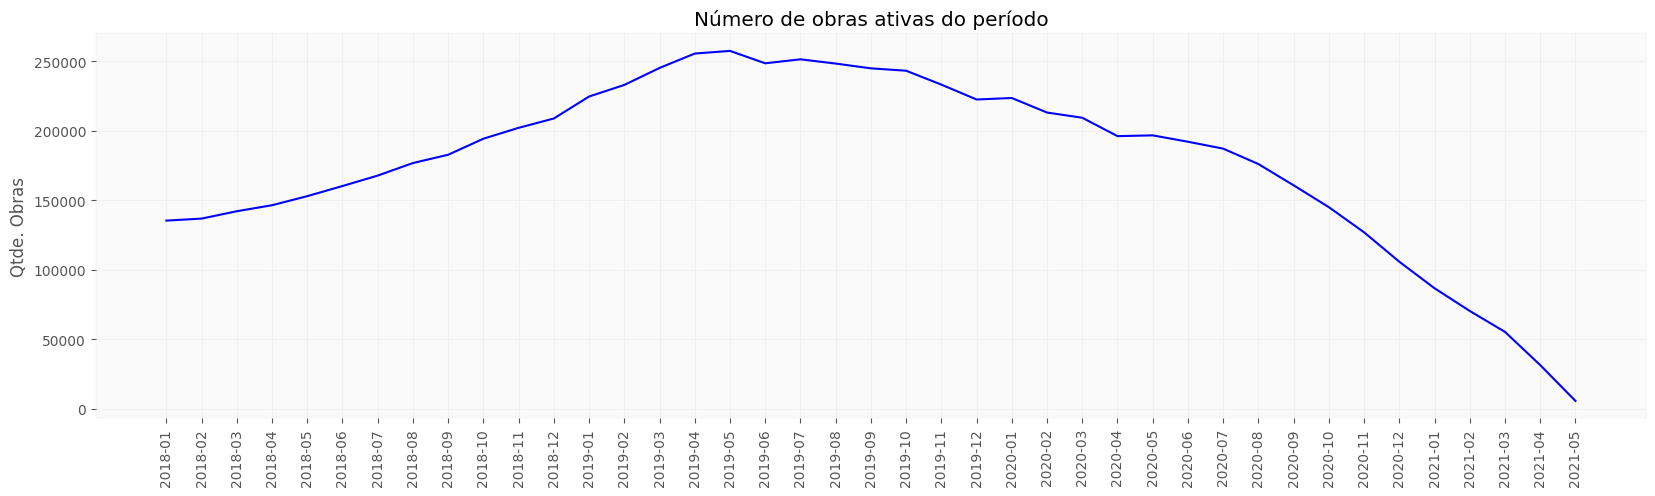

In [22]:
plt.figure(figsize=(20, 5))

df_chart = df.groupby('competencia')['num_obras'].sum().reset_index()
sns.lineplot(x='competencia', y='num_obras', data=df_chart, color='blue')

# Rotação das etiquetas do eixo x para melhor legibilidade (opcional)
plt.xticks(rotation=90)

plt.xlabel('')
plt.ylabel('Qtde. Obras')
plt.title('Número de obras ativas do período')

# Exibir o gráfico

plt.show()

Essa curva declinando a partir do mês de junho de 2020 não faz sentido, uma vez que o consumo e produção de cimento, além de contratações no setor de construção civil continuaram aquecidos neste mesmo período.

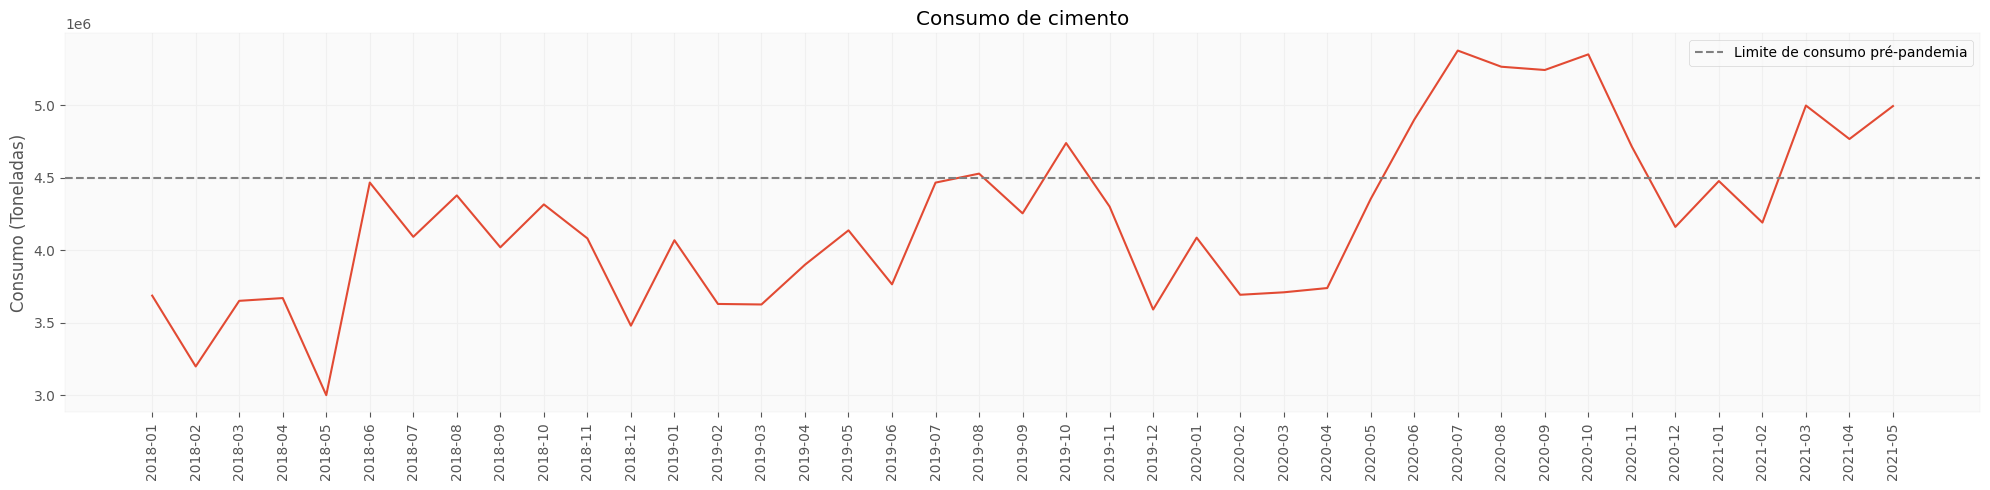

In [15]:
fig, ax = plt.subplots(1, 1,  figsize=(20, 5))

df_chart = df.groupby('competencia')['consumo'].sum().reset_index()
sns.lineplot(x='competencia', y='consumo', data=df_chart)

# Rotação das etiquetas do eixo x para melhor legibilidade (opcional)
plt.xticks(rotation=90)

plt.axhline(y=4500000, color='gray', linestyle='--', label='Limite de consumo pré-pandemia')

# Adicionar rótulos de eixo e título (opcional)
ax.set_ylabel('Consumo (Toneladas)')
ax.set_xlabel('')
ax.set_title('Consumo de cimento')

plt.legend()
# Exibir o gráfico
plt.tight_layout()
plt.show()

Percebe-se também claramentre uma alta no consumo de cimento a partir de junho de 2020. Até aquele momento o consumo dificilmente excedeu as 4,5 milhões de toneladas.

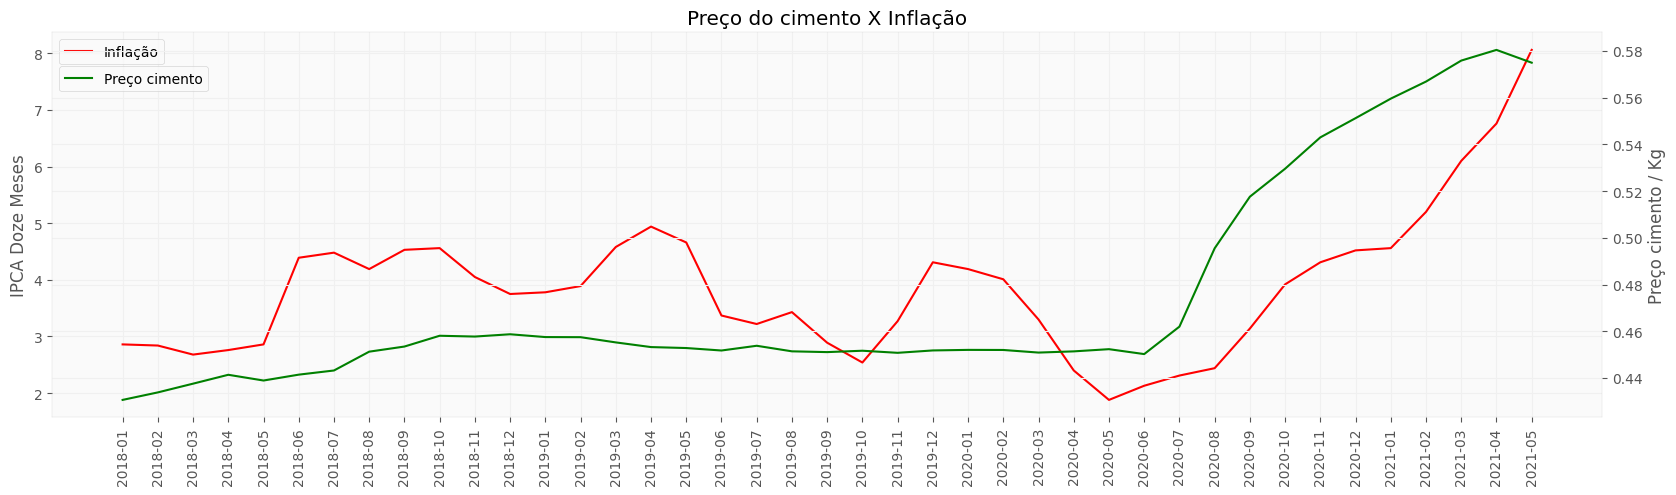

In [16]:
plt.figure(figsize=(20, 5))

df_chart = df.groupby('competencia')[['preco_cimento', 'ipca_variacao_doze_meses']].mean().reset_index()
ax1 = sns.lineplot(x='competencia', y='ipca_variacao_doze_meses', data=df_chart, color='red', label='Inflação')
ax2 = ax1.twinx()
sns.lineplot(x='competencia', y='preco_cimento', data=df_chart, color='green', ax=ax2, label='Preço cimento')

# Rotação das etiquetas do eixo x para melhor legibilidade (opcional)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Adicionar rótulos de eixo e título (opcional)
# ax.set_ylabel('Preço do cimento / Kg')
# ax.set_xlabel('')
# ax.set_title('Precificação do cimento')

ax1.set_xlabel('')
ax2.set_ylabel('Preço cimento / Kg')
ax1.set_ylabel('IPCA Doze Meses')
plt.title('Preço do cimento X Inflação')

# Ajuste a posição da legenda de Categoria B
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='upper left')
ax2.legend(lines2, labels2, loc='upper left', bbox_to_anchor=(0, 0.93))

# Exibir o gráfico

plt.show()

Apesar de todas as variações da inflação ao longo do tempo, o preço do cimento pareceu não acompanhar estas variações. Porém a partir do mês de julho de 2020 o preço do cimento tem uma disparada, antes mesmo da inflação começar a subir.

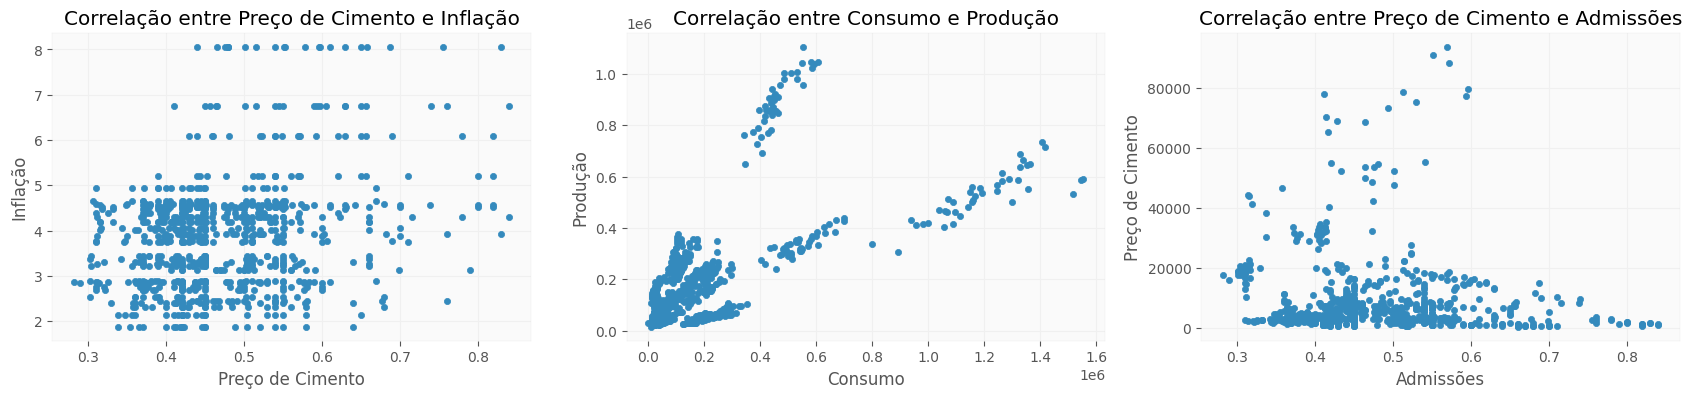

In [17]:
fig, ax = plt.subplots(1, 3,  figsize=(21, 4))

df_notnull = df.dropna()
df.plot.scatter(x='preco_cimento', y='ipca_variacao_doze_meses', ax=ax[0])
ax[0].set_title('Correlação entre Preço de Cimento e Inflação')
ax[0].set_ylabel('Inflação')
ax[0].set_xlabel('Preço de Cimento')

df.plot.scatter(x='producao', y='consumo', ax=ax[1])
ax[1].set_title('Correlação entre Consumo e Produção')
ax[1].set_ylabel('Produção')
ax[1].set_xlabel('Consumo')

df.plot.scatter(x='preco_cimento', y='admissoes', ax=ax[2])
ax[2].set_title('Correlação entre Preço de Cimento e Admissões')
ax[2].set_ylabel('Preço de Cimento')
ax[2].set_xlabel('Admissões')

plt.show()

Parece existir uma certa correlação entre o consumo e a produção de cimento, de forma que quando o consumo aumenta a produção também aumenta. O que faz total sentido, porém não parece ser uma correlação tão forte. As demais correlações mostradas parecem ser fracas.

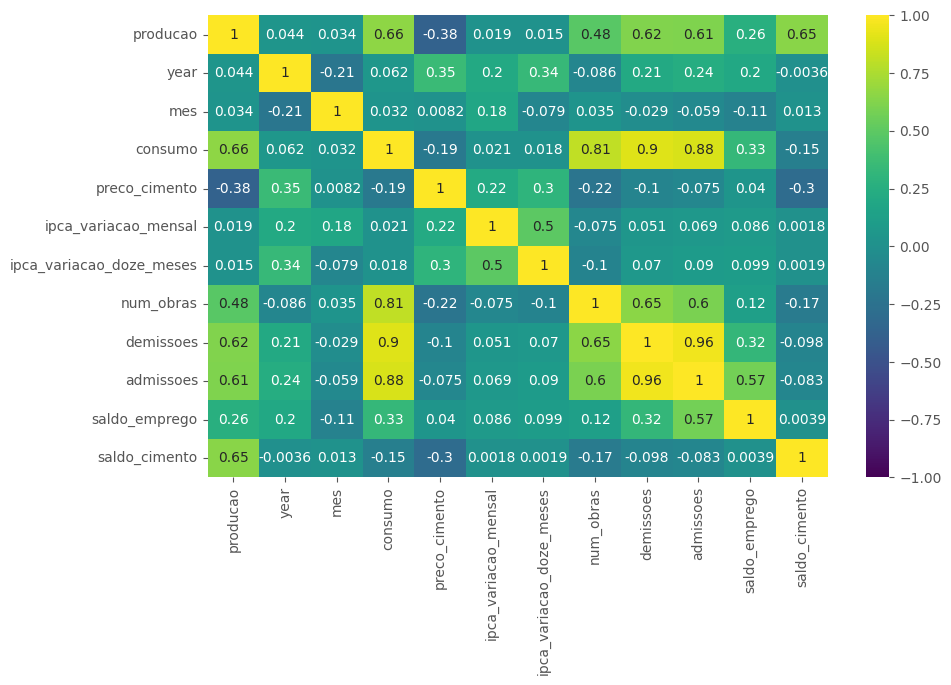

In [18]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', vmin=-1, vmax=1);

Para concluir, levando em consideração apenas o período de tempo amostral, que é considerado relativamente pequeno e por envolver um fenômeno como a pandemia que afetou a economia gerando volatilidade econômica e medidas governamentais, fica inviável fazer qualquer validação de hipóteses a partir destes dados. Porém é notável que o mercado se auto regula, produzindo a quantidade de cimento que é consumido, sem muitos excessos, o que provavelmente colaborou para que o preço do cimento se mativesse relativamente estável no período pré pandemia.

Para conseguir tirar dados realmente conclusivos deve-se futuramente pegar uma amostra maior e de preferência sem um fenomeno como a pandemia para que se consiga trabalhar com a formulação de hipoteses.